In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#load data

df = pd.read_csv(r'D:\NeuronetiX\Session1\data.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [7]:
#fill missing values in 'Caluries' column using average value on the column

df['Calories'].fillna(df['Calories'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  169 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_20320\242483201.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Calories'].fillna(df['Calories'].mean(), inplace=True)


In [8]:
#check duplicate rows

df.duplicated().sum()

7

In [9]:
#drop duplicated rows

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

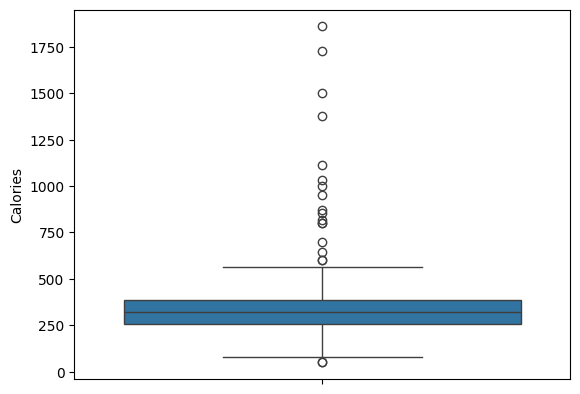

In [10]:
#check outliers in 'Calories' column

sns.boxplot(y='Calories', data=df)
plt.show()

In [11]:
# replace outliers in 'Calories' with mean value

Q1 = df['Calories'].quantile(0.25)
Q3 = df['Calories'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#replace outliers in 'Calories' with mean value

df['Calories'] = df['Calories'].apply(lambda x: df['Calories'].mean() if x < lower_bound or x > upper_bound else x)

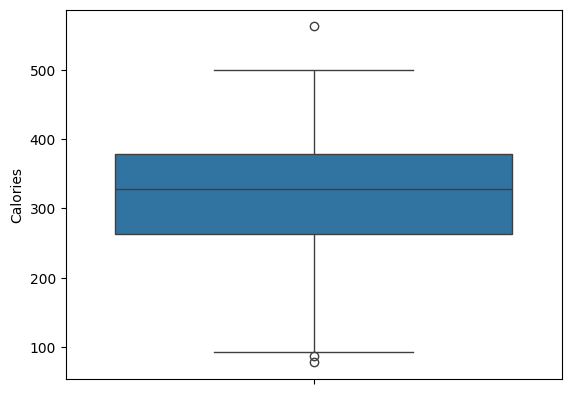

In [12]:
# recheck outliers in 'Calories' column

sns.boxplot(y='Calories', data=df)
plt.show()

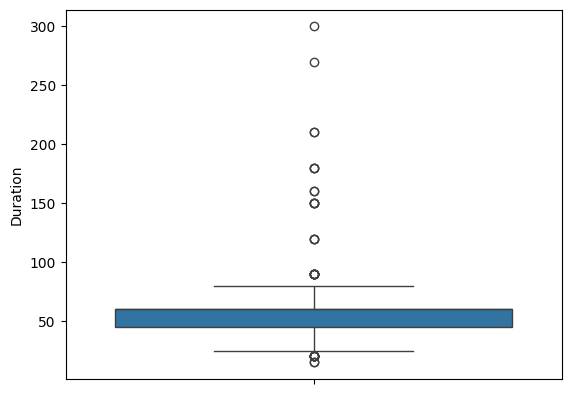

In [13]:
#check outliers in 'Duration' column

sns.boxplot(y='Duration', data=df)
plt.show()

In [14]:
# replace outliers in 'Calories' with mean value

Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#replace outliers in 'Calories' with mean value

df['Duration'] = df['Duration'].apply(lambda x: df['Duration'].mean() if x < lower_bound or x > upper_bound else x)

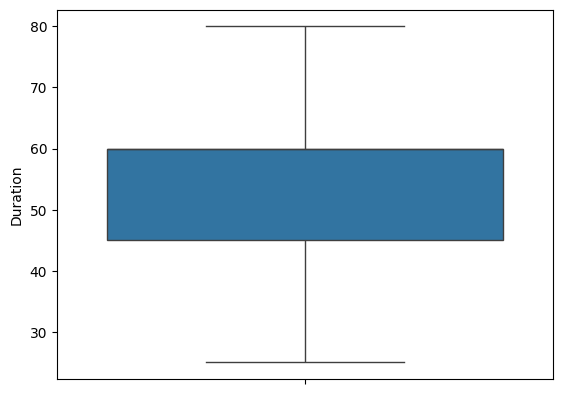

In [15]:
#check outliers in 'Duration' column

sns.boxplot(y='Duration', data=df)
plt.show()

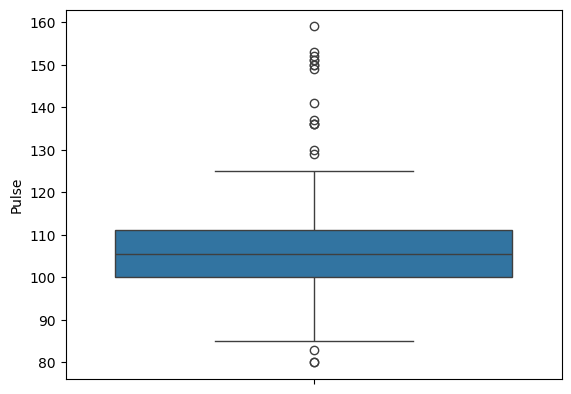

In [16]:
#check outliers in 'Pulse' column

sns.boxplot(y='Pulse', data=df)
plt.show()

In [17]:
# replace outliers in 'Calories' with mean value

Q1 = df['Pulse'].quantile(0.25)
Q3 = df['Pulse'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#replace outliers in 'Calories' with mean value

df['Pulse'] = df['Pulse'].apply(lambda x: df['Pulse'].mean() if x < lower_bound or x > upper_bound else x)

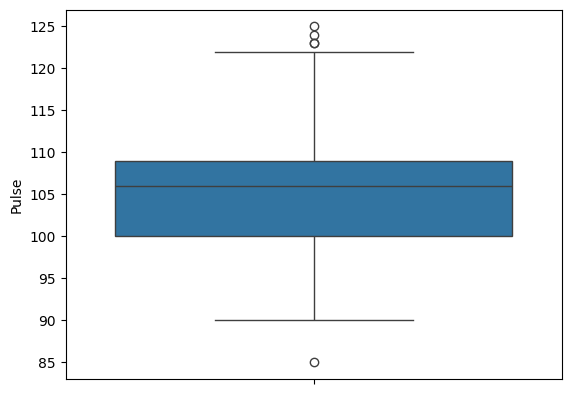

In [18]:
# recheck outliers in 'Pulse' column

sns.boxplot(y='Pulse', data=df)
plt.show()

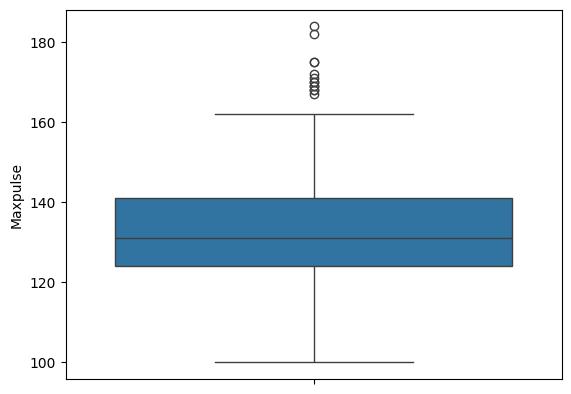

In [19]:
# check outliers in 'Maxpulse' column

sns.boxplot(y='Maxpulse', data=df)
plt.show()

In [20]:
# replace outliers in 'Calories' with mean value

Q1 = df['Maxpulse'].quantile(0.25)
Q3 = df['Maxpulse'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#replace outliers in 'Calories' with mean value

df['Maxpulse'] = df['Maxpulse'].apply(lambda x: df['Maxpulse'].mean() if x < lower_bound or x > upper_bound else x)

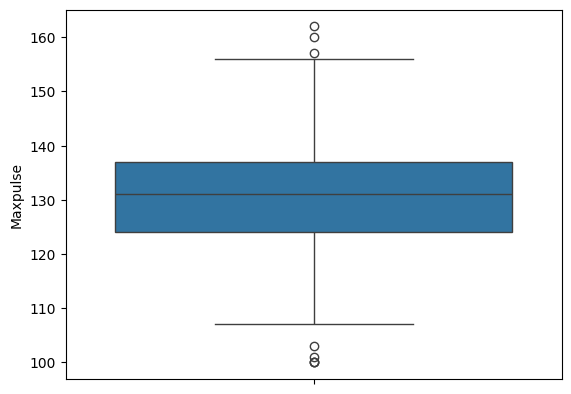

In [21]:
# recheck outliers in 'Maxpulse' column

sns.boxplot(y='Maxpulse', data=df)
plt.show()

In [22]:
### Visualization

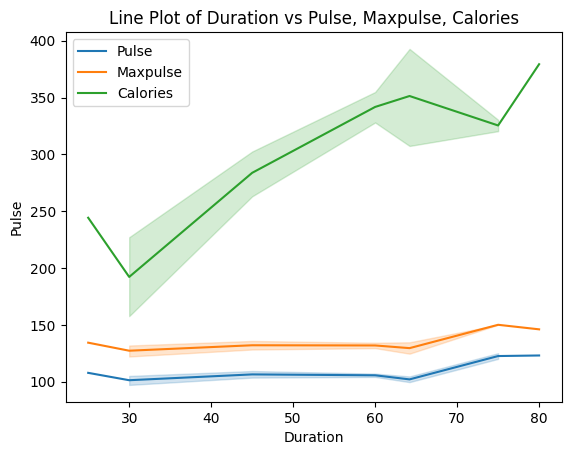

In [25]:
# Line plot
sns.lineplot(x='Duration', y='Pulse', data=df, label="Pulse")
sns.lineplot(x='Duration', y='Maxpulse', data=df, label="Maxpulse")
sns.lineplot(x='Duration', y='Calories', data=df, label="Calories")
plt.title('Line Plot of Duration vs Pulse, Maxpulse, Calories')
plt.legend()
plt.show()

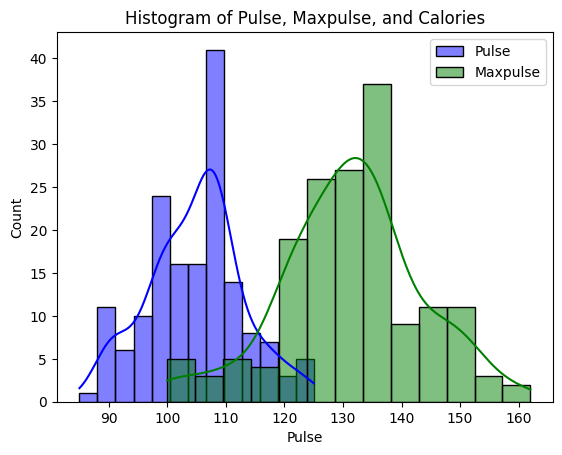

In [27]:
# Histogram for Pulse, Maxpulse, and Calories
sns.histplot(df['Pulse'], kde=True, color='blue', label='Pulse')
sns.histplot(df['Maxpulse'], kde=True, color='green', label='Maxpulse')
plt.title('Histogram of Pulse, Maxpulse, and Calories')
plt.legend()
plt.show()

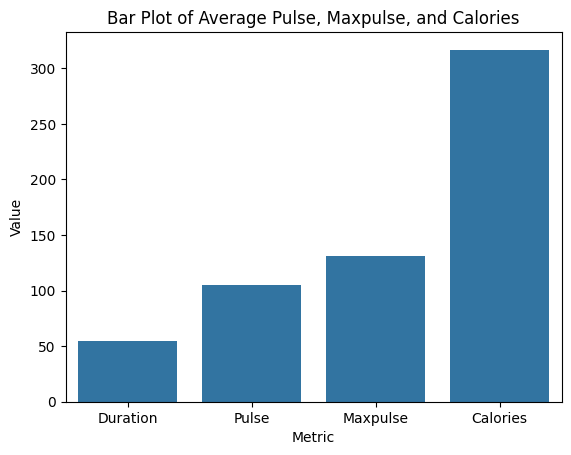

In [28]:
# Bar plot
df_avg = df.mean().reset_index(name='Value').rename(columns={'index':'Metric'})

sns.barplot(x='Metric', y='Value', data=df_avg)
plt.title('Bar Plot of Average Pulse, Maxpulse, and Calories')
plt.show()

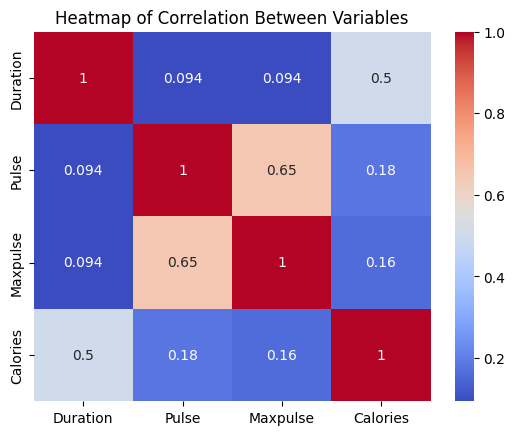

In [29]:
# Heatmap for correlation matrix
correlation = df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Variables')
plt.show()
